Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery

 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file. 'thousands' is used to format out the ',' when it appears in the numbers, skiprows will get rid of the first four rows (could also use skipheader), 
# skipfooter will remove the bottom three rows where the footnotes are located.
df = pd.read_csv('C:\\Users\\maken\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', thousands = ',', skiprows = 4, skipfooter = 3)

# Print the last few rows to ensure we are getting all of the data
print(df.tail())

                  City  Population  Violent\ncrime  \
343      Woodbury Town       10685               3   
344  Woodridge Village         829               7   
345     Woodstock Town        5931               2   
346            Yonkers      199134            1036   
347      Yorktown Town       36643              15   

     Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
343                                       0                           NaN   
344                                       0                           NaN   
345                                       0                           NaN   
346                                       6                           NaN   
347                                       0                           NaN   

     Rape\n(legacy\ndefinition)2  Robbery  Aggravated\nassault  \
343                            0        2                    1   
344                            0        0                    7   
345           

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [87]:
# Looks good. Let's grab the columns we need. 

df = df.iloc[:, [0, 1, 3, 6, 8]].dropna()
df.columns = ['City', 'Population', 'Murder', 'Robbery', 'Property\ncrime']
df.head()

,City,Population,Murder,Robbery,Property crime
0,Adams Village,1861,0,0,12
1,Addison Town and Village,2577,0,0,24
2,Akron Village,2846,0,0,16
3,Albany,97956,8,227,4090
4,Albion Village,6388,0,4,223


In [70]:
# Time to make some features.

df['Robbery_0'] = np.where(df['Robbery'] == 0, 0, 1)
df['Murder_0'] = np.where(df['Murder'] == 0, 0, 1)
df['Population2'] = df['Population'] * df['Population']

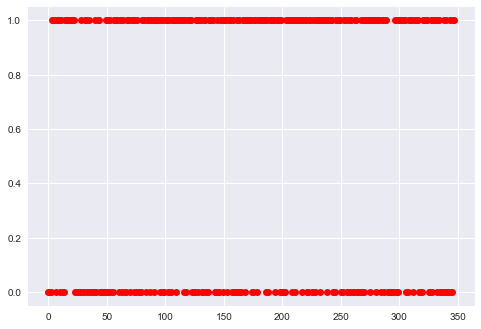

In [79]:
# Plot Robbery_0 to make sure there are no anomalies

plt.plot(df['Robbery_0'], 'ro')
plt.show()

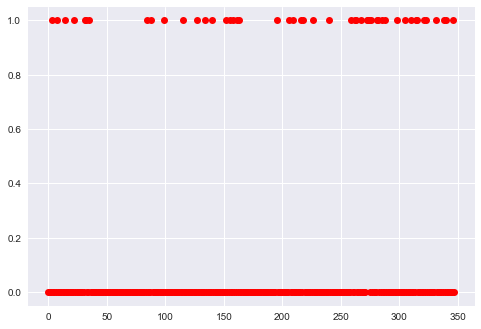

In [78]:
# Looks fine. 

# Do the same with Murder_0

plt.plot(df['Murder_0'], 'ro')
plt.show()

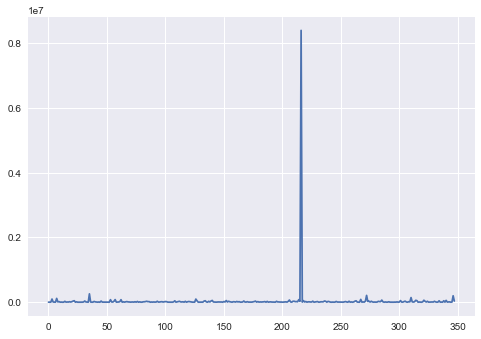

In [77]:
# Looks fine.

# Let's see what the population looks like. 

plt.plot(df['Population'])
plt.show()

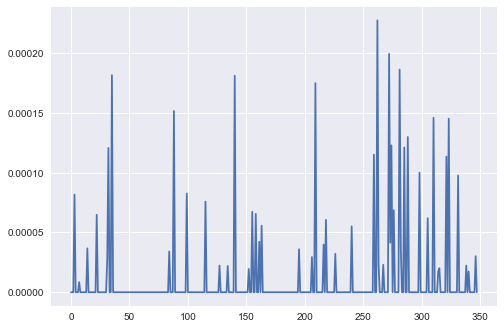

In [76]:
# NYC obviously has a much higher population... let's plot the murder per capita

plt.plot(df['Murder']/df['Population'])
plt.show()

In [88]:
df.to_pickle('C:\\Users\\maken\\2.4.2_Drill_Prepared_Data.pkl')